<a href="https://colab.research.google.com/github/CyprianKyalo/Machine-Learning/blob/main/Group_2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [613]:
import numpy as np
import pandas as pd
import math
import decimal
from sklearn.linear_model import Lasso,LassoCV, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Machine Learning Class Task

In [614]:
data = pd.read_csv('Nairobi Office Price Ex.csv')
data

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


In [615]:
data.shape

(14, 10)

## Prepare the dataset for training


In [616]:
# Checking if there exists columns with missing values
data.isna().any()

LOC          False
FUR          False
AMB          False
PROX_SCH     False
PROX_ROAD    False
PROX_MALL    False
WATER        False
HK_SER       False
SIZE         False
PRICE        False
dtype: bool

## Encoding the Dataset

In [617]:
# Checking datatypes of the features
data.dtypes

LOC           object
FUR           object
AMB           object
PROX_SCH      object
PROX_ROAD     object
PROX_MALL     object
WATER         object
HK_SER        object
SIZE         float64
PRICE        float64
dtype: object

In [618]:
data.head(5)

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925


In [619]:
# categorical variable is a variable type with two or more categories
categorical_data=data.select_dtypes(include=['object']).copy()
categorical_data.head(2)

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER
0,karen,yes,serene,no,yes,yes,yes,yes
1,madaraka,yes,semi_serene,yes,yes,yes,no,no


In [620]:
# Placing categorical data in a list
cat_features=list(categorical_data.columns)
cat_features

['LOC', 'FUR', 'AMB', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL', 'WATER', 'HK_SER']

In [621]:
# Placing all features in the dataset in a list
original_features = list(data.columns)
original_features

['LOC',
 'FUR',
 'AMB',
 'PROX_SCH',
 'PROX_ROAD',
 'PROX_MALL',
 'WATER',
 'HK_SER',
 'SIZE',
 'PRICE']

In [622]:
# Separating data into nominal, ordinal and numerical

# Nominal data is data that can be labelled or classified into mutually exclusive categories within a variable
nominal=['LOC', 'FUR', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL', 'WATER', 'HK_SER']

# Ordinal data is a kind of categorical data with a set order or scale to it.
ordinal=list(set(cat_features)-set(nominal))

# Numerical data is a data type expressed in numbers, rather than natural language description. 
numerical=list(set(original_features)-set(cat_features))
target=['PRICE']

In [623]:
ordinal

['AMB']

In [624]:
# The target feature is SalePrice
data[target]

,PRICE
0,31.707006
1,68.777596
2,62.562382
3,71.546632
4,87.230925
5,78.211518
6,79.641973
7,59.171489
8,75.331242
9,71.300880


In [625]:
data[ordinal]

,AMB
0,serene
1,semi_serene
2,noisy
3,semi_serene
4,semi_serene
5,serene
6,very_noisy
7,serene
8,semi_serene
9,serene


In [626]:
# Looping through ordinal features and encoding them
for feature in ordinal:
  data[feature]=(data[feature].astype('category')).cat.codes

In [627]:
df_nominal=pd.get_dummies(data[nominal])
df_nominal.head(3)

,LOC_buruburu,LOC_donholm,LOC_karen,LOC_langata,LOC_madaraka,FUR_no,FUR_yes,PROX_SCH_no,PROX_SCH_yes,PROX_ROAD_no,PROX_ROAD_yes,PROX_MALL_no,PROX_MALL_yes,WATER_no,WATER_yes,HK_SER_no,HK_SER_yes
0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1
1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0
2,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1


In [628]:
# Assigning ordinal data to df_ordinal
df_ordinal=data[ordinal]

In [629]:
# Assigning numerical data to df_numerical
df_numerical=data[numerical]

In [630]:
# Concatenating encoded data into one
encoded_data=pd.concat([df_nominal,df_ordinal, df_numerical],axis=1)
encoded_data.head(3)

,LOC_buruburu,LOC_donholm,LOC_karen,LOC_langata,LOC_madaraka,FUR_no,FUR_yes,PROX_SCH_no,PROX_SCH_yes,PROX_ROAD_no,PROX_ROAD_yes,PROX_MALL_no,PROX_MALL_yes,WATER_no,WATER_yes,HK_SER_no,HK_SER_yes,AMB,PRICE,SIZE
0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,2,31.707006,32.502345
1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,68.777596,53.426804
2,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,62.562382,61.530358


In [631]:
encoded_data.shape

(14, 20)

## Feature Selection using L1

In [632]:
X = encoded_data.drop('PRICE', 1)
y = encoded_data['PRICE']
regressor = LassoCV()
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


LassoCV()

In [633]:
X.head(3)

,LOC_buruburu,LOC_donholm,LOC_karen,LOC_langata,LOC_madaraka,FUR_no,FUR_yes,PROX_SCH_no,PROX_SCH_yes,PROX_ROAD_no,PROX_ROAD_yes,PROX_MALL_no,PROX_MALL_yes,WATER_no,WATER_yes,HK_SER_no,HK_SER_yes,AMB,SIZE
0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,2,32.502345
1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,53.426804
2,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,61.530358


L1 selected only  5  features out of  19  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

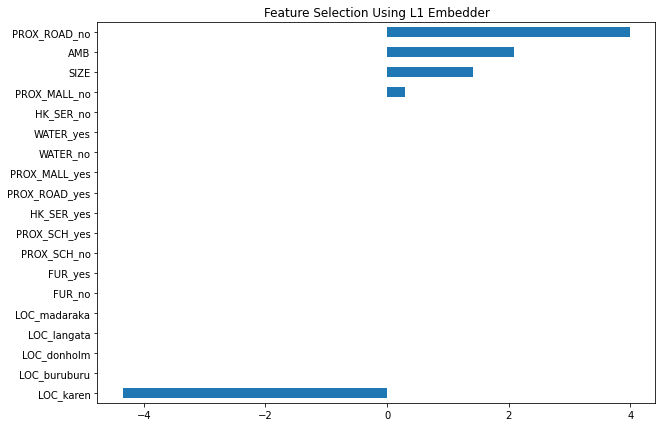

In [634]:
coef_col = pd.Series(regressor.coef_, index=X.columns)

sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

In [635]:
# The result shows the selected features by L1
c = pd.DataFrame(coef_col)
selected_features = list((c.loc[c[0] != 0]).index)
selected_features

['LOC_karen', 'PROX_ROAD_no', 'PROX_MALL_no', 'AMB', 'SIZE']

### Standardization of data

In [636]:
X = encoded_data[selected_features].values
y = data[target].values

In [637]:
X

array([[ 1.        ,  0.        ,  0.        ,  2.        , 32.50234527],
       [ 0.        ,  0.        ,  0.        ,  1.        , 53.42680403],
       [ 1.        ,  0.        ,  0.        ,  0.        , 61.53035803],
       [ 1.        ,  1.        ,  1.        ,  1.        , 47.47563963],
       [ 0.        ,  0.        ,  0.        ,  1.        , 59.81320787],
       [ 0.        ,  1.        ,  0.        ,  2.        , 55.14218841],
       [ 0.        ,  0.        ,  1.        ,  3.        , 52.21179669],
       [ 0.        ,  1.        ,  0.        ,  2.        , 39.29956669],
       [ 0.        ,  1.        ,  1.        ,  1.        , 48.10504169],
       [ 1.        ,  1.        ,  1.        ,  2.        , 52.55001444],
       [ 0.        ,  0.        ,  1.        ,  0.        , 45.41973014],
       [ 0.        ,  1.        ,  0.        ,  1.        , 54.35163488],
       [ 0.        ,  0.        ,  1.        ,  1.        , 44.1640495 ],
       [ 1.        ,  0.        ,  0. 

In [638]:
PredictorScaler = StandardScaler()
TargetVariableScaler = StandardScaler()

In [639]:
# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
TargetVariableScalerFit = TargetVariableScaler.fit(y)

In [640]:
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVariableScalerFit.transform(y)

In [641]:
X

array([[ 1.34164079, -0.8660254 , -0.8660254 ,  0.89802651, -2.28520557],
       [-0.74535599, -0.8660254 , -0.8660254 , -0.3592106 ,  0.40190153],
       [ 1.34164079, -0.8660254 , -0.8660254 , -1.61644772,  1.44255533],
       [ 1.34164079,  1.15470054,  1.15470054, -0.3592106 , -0.36234362],
       [-0.74535599, -0.8660254 , -0.8660254 , -0.3592106 ,  1.22203988],
       [-0.74535599,  1.15470054, -0.8660254 ,  0.89802651,  0.62219022],
       [-0.74535599, -0.8660254 ,  1.15470054,  2.15526362,  0.24587098],
       [-0.74535599,  1.15470054, -0.8660254 ,  0.89802651, -1.41231026],
       [-0.74535599,  1.15470054,  1.15470054, -0.3592106 , -0.28151616],
       [ 1.34164079,  1.15470054,  1.15470054,  0.89802651,  0.28930471],
       [-0.74535599, -0.8660254 ,  1.15470054, -1.61644772, -0.62636235],
       [-0.74535599,  1.15470054, -0.8660254 , -0.3592106 ,  0.52066778],
       [-0.74535599, -0.8660254 ,  1.15470054, -0.3592106 , -0.78761614],
       [ 1.34164079, -0.8660254 , -0.8

### Splitting Dataset into training and testing

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [643]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9, 5)
(9, 1)
(5, 5)
(5, 1)


### Creating the ANN model

In [644]:
model = Sequential()

In [645]:
# Defining the input layer and first hidden layer
model.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='tanh'))

In [646]:
# Defining the second layer of the model
model.add(Dense(units=4, kernel_initializer='normal', activation='tanh'))

In [647]:
# Defining the third layer of the model
model.add(Dense(units=2, kernel_initializer='normal', activation='tanh'))

In [648]:
# The output neuron is a single fully connected node since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [649]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [650]:
# Fitting the ann to the training set
model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 433ms/step - loss: 0.5291
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5288
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5284
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5281
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5278
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5275
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5272
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5269
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5266
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5263
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5260
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5257
Epoch 13/100
1/1 [==============================] - 0s 6ms

### Finding the best parameters using manual grid search

In [651]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[2, 4, 5, 7]
    epoch_list  =   [100, 200, 300, 400]
    
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the second layer of the model
            model.add(Dense(units=4, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


In [652]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 2 - epochs: 100 Accuracy: 77.1168073512133
2 Parameters: batch_size: 2 - epochs: 200 Accuracy: 47.5242979199521
3 Parameters: batch_size: 2 - epochs: 300 Accuracy: 69.09457770606058
4 Parameters: batch_size: 2 - epochs: 400 Accuracy: 69.22548366618933
5 Parameters: batch_size: 4 - epochs: 100 Accuracy: 93.75679863461413
6 Parameters: batch_size: 4 - epochs: 200 Accuracy: 56.21383414090124
7 Parameters: batch_size: 4 - epochs: 300 Accuracy: 43.394389276490735
8 Parameters: batch_size: 4 - epochs: 400 Accuracy: 47.954378353137166
9 Parameters: batch_size: 5 - epochs: 100 Accuracy: 82.89422561922704
10 Parameters: batch_size: 5 - epochs: 200 Accuracy: 74.56023938134044
11 Parameters: batch_size: 5 - epochs: 300 Accuracy: 85.4566059098735
12 Parameters: batch_size: 5 - epochs: 400 Accuracy: 82.48411036827594
13 Parameters: batch_size: 7 - epochs: 100 Accuracy: 90.81808640958046
14 Parameters: batch_size: 7 - epochs: 200 Accuracy: 71.3049013132727
15 Parameters: ba

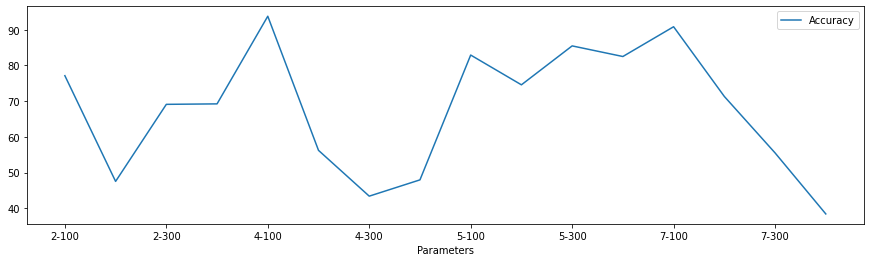

In [653]:
# Visualizing the results of parameter trials for ANN
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

### Training the ANN model with the best parameters


In [654]:
model.fit(X_train, y_train, batch_size=4, epochs=100, verbose=0)

In [655]:
# Generating predictions
Predictions = model.predict(X_test)

In [656]:
# Scaling the predicted PRICE data back to original PRICE scale
Predictions=TargetVariableScalerFit.inverse_transform(Predictions)

In [657]:
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVariableScalerFit.inverse_transform(y_test)

In [658]:
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [659]:
TestingData=pd.DataFrame(data=Test_Data, columns=selected_features)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,LOC_karen,PROX_ROAD_no,PROX_MALL_no,AMB,SIZE,Price,PredictedPrice
0,1.0,1.0,1.0,2.0,52.550014,71.300880,80.512596
1,0.0,1.0,0.0,1.0,54.351635,82.478847,71.097923
2,1.0,0.0,0.0,2.0,32.502345,31.707006,59.889328
3,0.0,0.0,1.0,1.0,44.164049,62.008923,67.945511
4,0.0,1.0,0.0,2.0,55.142188,78.211518,79.973862


### Finding the accuracy of the model

Using the final trained model, we are now generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all rows is known as Mean Absolute Percentage Error(MAPE).

In [660]:
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 74.5142512321661


,LOC_karen,PROX_ROAD_no,PROX_MALL_no,AMB,SIZE,Price,PredictedPrice,APE
0,1.0,1.0,1.0,2.0,52.550014,71.300880,80.512596,12.919499
1,0.0,1.0,0.0,1.0,54.351635,82.478847,71.097923,13.798597
2,1.0,0.0,0.0,2.0,32.502345,31.707006,59.889328,88.883581
3,0.0,0.0,1.0,1.0,44.164049,62.008923,67.945511,9.573763
4,0.0,1.0,0.0,2.0,55.142188,78.211518,79.973862,2.253304


# ANN Revision

In [447]:
# Specifying the batch size
batch_size = 2

In [448]:
# Initializing the inputs
data = {'x1': [0.52, 0.3, 0.7, 0.23], 'x2': [-0.2, 0.92, 0.12, -0.1], 'y': [0.6, 0.43, -0.89, 0.58]}
data

{'x1': [0.52, 0.3, 0.7, 0.23],
 'x2': [-0.2, 0.92, 0.12, -0.1],
 'y': [0.6, 0.43, -0.89, 0.58]}

In [449]:
# Converting the data into a dataframe for easier visualization
data = pd.DataFrame(data)
data

,x1,x2,y
0,0.52,-0.20,0.60
1,0.30,0.92,0.43
2,0.70,0.12,-0.89
3,0.23,-0.10,0.58


# Creating a class to handle all the computations

In [450]:
class ANN:
  def __init__(self, data, batch_size = data.shape[0]):
    self.data = data
    self.batch_size = batch_size
    self.weight_1 = np.array([[0.3, 0.5, 0.9], [0.7, 0.8, 0.3]])
    self.weight_2 = np.array([[0.12, 0.13, 0.1, 0.3], [0.89, 0.1, 0.2, 0.6], [0.7, 0.6, 0.43, 0.26]])
    self.weight_3 = np.array([0.7, 0.1, 0.4, 0.9])

  # Function to compute tanh
  def tanh(self, x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

  # Function to compute the activation of a layer
  def activate(self, layer):
    new_arr = []
    for x in range(layer.shape[0]):
      inside_arr = []
      for y in layer[x]:
        inside_arr.append(self.tanh(y))
      new_arr.append(inside_arr)

    return np.array(new_arr)
  
  # Function to compute activated output of the first layer
  def first_layer(self):
    return self.activate(np.dot((self.data.iloc[:self.batch_size, :self.batch_size]).to_numpy(), self.weight_1))

  # Function to compute activated output of the second layer
  def second_layer(self):
    return self.activate(np.dot(self.first_layer(), self.weight_2))

  # Function to compute activated output of the last layer
  def final_layer(self):
    return np.dot(self.second_layer(), self.weight_3)

  # Function to calculate Mean Squared Error
  def MSE(self):
    errors = []
    count = 0
    y_true = np.array(self.data.iloc[:self.batch_size, self.batch_size:]).reshape(1, 2)[0]
    for x, y in zip(y_true, self.final_layer()):
      error = (x - y)**2
      errors.append(error)
      count += 1
    return sum(errors)/count 


In [451]:
ann = ANN(data, batch_size)
# ann.first_layer()
# ann.second_layer()
# ann.final_layer()
print("The Mean Squared Error is", ann.MSE())


The Mean Squared Error is 0.3993754661113965


# Calculating the question Step by Step

#### Initializing the weights

In [452]:
weight_1 = np.array([[0.3, 0.5, 0.9], [0.7, 0.8, 0.3]])
weight_1

array([[0.3, 0.5, 0.9],
       [0.7, 0.8, 0.3]])

In [453]:
weight_2 = np.array([[0.12, 0.13, 0.1, 0.3], [0.89, 0.1, 0.2, 0.6], [0.7, 0.6, 0.43, 0.26]])
weight_2

array([[0.12, 0.13, 0.1 , 0.3 ],
       [0.89, 0.1 , 0.2 , 0.6 ],
       [0.7 , 0.6 , 0.43, 0.26]])

In [454]:
weight_3 = np.array([0.7, 0.1, 0.4, 0.9])
weight_3

array([0.7, 0.1, 0.4, 0.9])

#First Layer

In [455]:
first_layer = np.dot((data.iloc[:batch_size, :batch_size]).to_numpy(), weight_1)
first_layer

array([[0.016, 0.1  , 0.408],
       [0.734, 0.886, 0.546]])

In [456]:
first_layer.shape

(2, 3)

#### activating using tanh 
tanh
=
e^
x
−
e^
−
x/
e^
x
+
e^
−
x


In [457]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [458]:
def activate(layer):
  new_arr = []
  for x in range(layer.shape[0]):
    inside_arr = []
    for y in layer[x]:
      inside_arr.append(tanh(y))
    new_arr.append(inside_arr)

  return np.array(new_arr)

In [459]:
# activating first layer
first_layer = activate(first_layer)
first_layer

array([[0.01599863, 0.09966799, 0.38677318],
       [0.62550641, 0.70941243, 0.4975163 ]])

# Second Layer

In [460]:
weight_2

array([[0.12, 0.13, 0.1 , 0.3 ],
       [0.89, 0.1 , 0.2 , 0.6 ],
       [0.7 , 0.6 , 0.43, 0.26]])

In [461]:
second_layer = np.dot(first_layer, weight_2)
second_layer

array([[0.36136558, 0.24411053, 0.18784593, 0.16516142],
       [1.05469924, 0.45076685, 0.41836513, 0.74265362]])

In [462]:
# activating the second layer
second_layer = activate(second_layer)
second_layer

array([[0.34641631, 0.23937454, 0.18566723, 0.16367585],
       [0.78362662, 0.42252916, 0.39555225, 0.63074574]])

# Final Layer

In [463]:
weight_3

array([0.7, 0.1, 0.4, 0.9])

In [464]:
final_layer = np.dot(second_layer, weight_3)
final_layer

array([0.48800402, 1.31668362])

# Computing the error
MSE formula = (1/n) * Σ(y_true – y_hat)^2

In [465]:
y_true = np.array(data.iloc[:batch_size, batch_size:]).reshape(1, 2)[0]
y_true

array([0.6 , 0.43])

In [466]:
y_hat = final_layer
y_hat

array([0.48800402, 1.31668362])

In [467]:
def MSE(y_true, y_hat):
  errors = []
  count = 0
  for x, y in zip(y_true, y_hat):
    error = (x - y)**2
    errors.append(error)
    count += 1
  return sum(errors)/count

In [468]:
# The Mean Squared Error
print('The Mean Squared Error is', MSE(y_true, y_hat))

The Mean Squared Error is 0.3993754661113965
